<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0101EN-SkillsNetwork/IDSNlogo.png" width="300" alt="cognitiveclass.ai logo">
</center>


# Machine Learning Foundation

## Section 2, Part a: Regression Intro: Transforming Target 


## Learning objectives

By the end of this lesson, you will be able to:

* Apply transformations to make target variable more normally distributed for Regression
* Apply inverse transformations to be able to use these in a Regression context


In [1]:
!pip install numpyBest practices for any modeling, is first we establish what our cost function that we want to minimize is going to be. This will give us a method to compare the strength of one model versus the other. We then want to develop multiple models, perhaps with different hyper-parameters, perhaps different models altogether to see which one of the models will give us our best predictions. Then finally, we can compare results and choose the best one according to our cost function. Now, another important metric, besides mean squared error, that we should keep in mind is the R-squared metric. We're going to break down its components here. The first one is going to be the sum squared error. That's going to measure the distance between truth and our predictions, similar to that portion of our cost function that we saw earlier. That's going to be sum of squared error. Our total squared error just measures the distance between the truth and the average values of the truth. Sum of squared error is the unexplained variation from our model. We had a line through each one of our dots and it's going to be, what were we not able to explain. That's going to be the sum of squared error and then the total squared error is the total variation. Imagine just a line going horizontal, which is the average values and that'd be the total variation around the mean of our outcome variable. R-squared is a measure of the explained variation by our model. We see here 1 minus our sum of squared error, which is our unexplained variance, divided by the total variance. One minus the unexplained variance is essentially what is our explained variation. We're saying how well did our model explain the variation from the mean? How much was it able to reduce the amount of unexplained variance? The closer this is to one, the better we did in regards to explaining the overall variance. Now, we want to keep in mind that as we make any model more complex, we can better fit to every single data point if we'd like. We can always, for example, add-on more features. Even if those features don't have any predictive power, they will never bring down the R-squared score. If you were to add on another feature and it didn't have any predictive power, we can just set that coefficient to 0 and it wouldn't bring down our R-squared because we will still be explaining the same amount of variation. Also, I want you to know that this isn't the score that we can only use for linear regression, even though you've probably heard about it in regards to linear regression in most of your past lessons wherever they may be. But you can actually use this for any regression model in order to understand the explained variance given that model. How do we actually do this in Python? Our first step will be to import that class containing the regression method. I actually didn't get a quick introduction to Sklearn earlier, but this is going to be our first introduction to using Sklearn for a predictor. From sklearn.linear_model, we're going to import the linear regression function. The next step is going to be to create an instance of this class and this is going to be our algorithm. It just has not been fitted to any dataset yet. We're just calling our object LR. LR is going to be our linear regression objects, which is our model just not fit to any data yet. If you recall, we have our model and then we pass in the data and then that model is fitted to optimize, bringing down that loss function as much as possible. We then fit the instance on the data and we can then predict the expected value. Here the training data that we're going to train our model on, the data that we already have is going to be x _train and y _train. We call it LR.fit, and we are fitting on x _train and y _train. Now, we have a fitted version of our model where we have come up with these coefficients. Then we can call LR.predict. This predict method is now, available to this fitted model in order to predict on a test set that we have not seen yet, that does not have labels and that will be our predictions. We'll see this as we get into the notebook right after this section. Let's recap what we've learned so far. We have gone over linear regression as well as the loss function that we may want to be aware of, as well as how to optimize that according to the different parameters, Beta knot and Beta 1. We talked about modeling best practices in regards to making sure that we are first coming up with what our model is, what our loss function is, looking at different models, and then optimizing which one is the best model that we should use given our loss function. With all that, we discussed how to measure errors. We talked about how we don't want to just subtract and end up with positive, negative values, but rather how we're going to use the square those values in order to actually come up with an optimal model, as well as going over R-squared and how that will help us define how well we are actually explaining the overall variance. From here, we'll jump into the notebook and I look forward to seeing you there. Thank you.
!pip install pandas
!pip install matplotlib
!pip install scipy
!pip install scikit-learn

/bin/bash: -c: line 1: unexpected EOF while looking for matching `''
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.7/12.7 MB 179.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.1/16.1 MB 204.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 104.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 127.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 136.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 MB 133.5 MB/s eta 0:00:0000:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 153.5 MB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# Surpress warnings:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In the following cells we will load the data and define some useful plotting functions.


In [3]:
np.random.seed(72018)


def to_2d(array):
    return array.reshape(array.shape[0], -1)
    
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data
    
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

In [4]:
!wget "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle"

--2025-01-29 23:50:44--  https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-ML240EN-SkillsNetwork/labs/data/boston_housing_clean.pickle
Resolving cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)... 169.63.118.104
Connecting to cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud (cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud)|169.63.118.104|:443... connected.
200 OKequest sent, awaiting response... 
Length: 60056 (59K) [binary/octet-stream]
Saving to: ‘boston_housing_clean.pickle.1’

boston_housing_clea 100%[===================>]  58.65K  --.-KB/s    in 0.001s  

2025-01-29 23:50:44 (72.1 MB/s) - ‘boston_housing_clean.pickle.1’ saved [60056/60056]



### Loading the Boston Housing Data


In [5]:
with open('boston_housing_clean.pickle', 'rb') as to_read:
    boston = pd.read_pickle(to_read)
boston_data = boston['dataframe']
boston_description = boston['description']

In [6]:
boston_data.head(15)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


### Determining Normality


Making our target variable normally distributed often will lead to better results

If our target is not normally distributed, we can apply a transformation to it and then fit our regression to predict the transformed values.

How can we tell if our target is normally distributed? There are two ways:

* Using a Visual approach
* Using a Statistical Test


#### Using a Visual approach


#### Plotting a histogram:


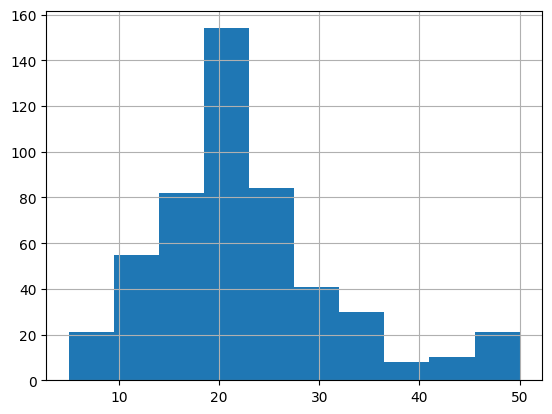

In [7]:
boston_data.MEDV.hist();

The histogram does not look normal due to its right tail.


#### Using a Statistical Test


Without getting into Bayesian vs. frequentist debates, for the purposes of this lesson, the following will suffice:

* This is a statistical test that tests whether a distribution is normally distributed or not. It isn't perfect, but suffice it to say: 
    * This test outputs a **p-value**. The _higher_ this p-value is the _closer_ the distribution is to normal.
    * Frequentist statisticians would say that you accept that the distribution is normal (more specifically: fail to reject the null hypothesis that it is normal) if p > 0.05.


In [8]:
from scipy.stats.mstats import normaltest # D'Agostino K^2 Test

In [9]:
normaltest(boston_data.MEDV.values)

NormaltestResult(statistic=np.float64(90.9746873700967), pvalue=np.float64(1.7583188871696095e-20))

p-value is _extremely_ low. Our **y** variable which we have been dealing with this whole time was not normally distributed!


### Apply transformations to make target variable more normally distributed for Regression


Linear Regression assumes a normally distributed residuals which can be aided by transforming **y** variable which is the target variable. Let's try some common transformations to try and get **y** to be normally distributed: 

* Log Transformation
* Square root Transformation
* Box cox Transformation


### Log Transformation


The log transformation can transform data that is significantly skewed right to be more normally distributed:


In [10]:
def plot_exponential_data():
    data = np.exp(np.random.normal(size=1000))
    plt.hist(data)
    plt.show()
    return data

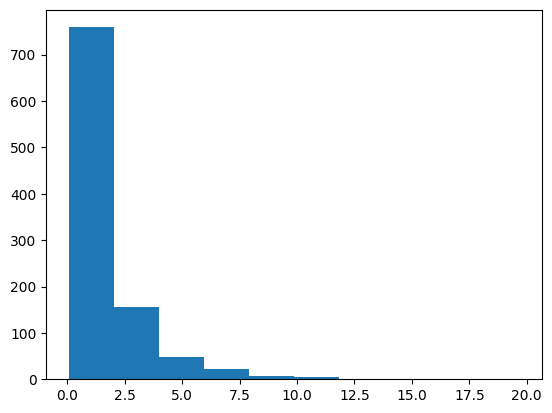

In [11]:
data = plot_exponential_data()

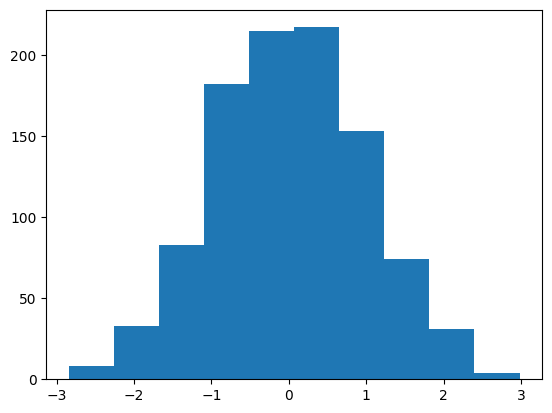

In [12]:
plt.hist(np.log(data)); # after transformation

**Apply transformation to Boston Housing data:**


In [13]:
log_medv = np.log(boston_data.MEDV)

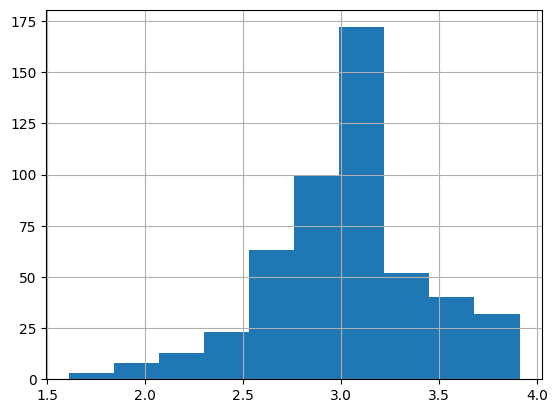

In [14]:
log_medv.hist();

In [15]:
normaltest(log_medv)

NormaltestResult(statistic=np.float64(17.21801696640698), pvalue=np.float64(0.00018245472768345196))

Conclusion: The output is closer to normal distribution, but still not completely normal.


### Square root Transformation

The square root transformation is another transformation that can transform non-normally distributed data into normally distributed data:


In [16]:
def plot_square_normal_data():
    data = np.square(np.random.normal(loc=5, size=1000))
    plt.hist(data)
    plt.show()
    return data

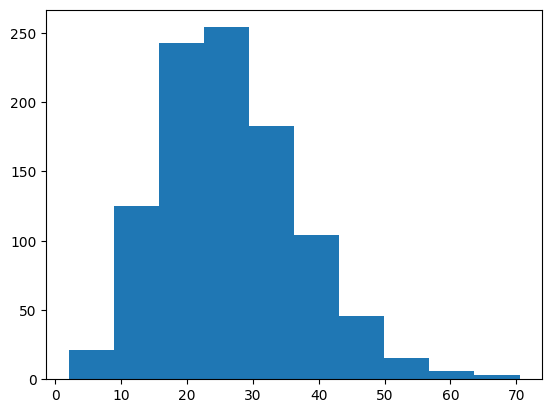

In [17]:
data = plot_square_normal_data()

You may notice that the output still exhibits a slight right skew.


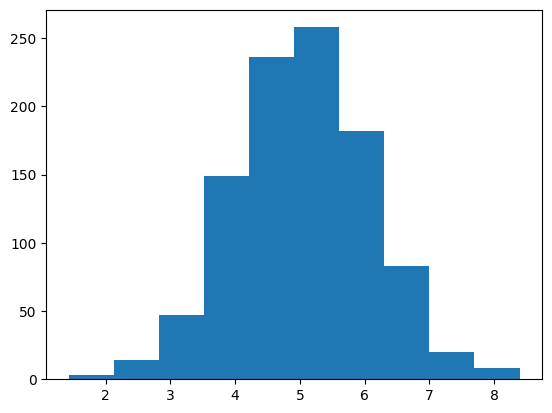

In [18]:
plt.hist(np.sqrt(data));

#### Exercise


Apply the square root transformation to the Boston Housing data target and test whether the result is normally distributed.


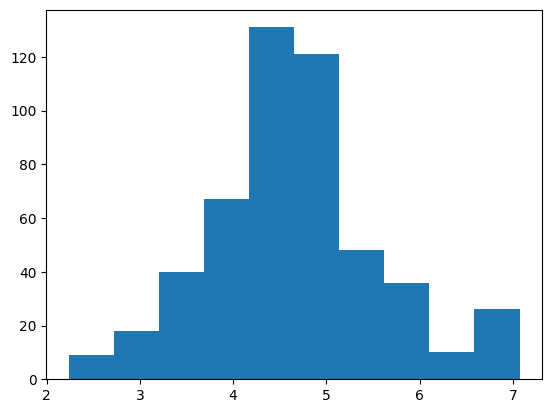

In [19]:
## Enter your code here
sqrt_medv = (np.sqrt(boston_data.MEDV))
plt.hist(sqrt_medv)
plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
sqrt_medv = np.sqrt(boston_data.MEDV)
plt.hist(sqrt_medv)

```


In [20]:
normaltest(sqrt_medv)

NormaltestResult(statistic=np.float64(20.487090826863067), pvalue=np.float64(3.558645701429252e-05))

### Box cox Transformation


The box cox transformation is a parametrized transformation that tries to get distributions "as close to a normal distribution as possible".

It is defined as:

$$ \text{boxcox}(y_i) = \frac{y_i^{\lambda} - 1}{\lambda} $$

You can think of as a generalization of the square root function: the square root function uses the exponent of 0.5, but box cox lets its exponent vary so it can find the best one.


In [21]:
from scipy.stats import boxcox

In [22]:
bc_result = boxcox(boston_data.MEDV)

In [23]:
type(bc_result)

tuple

In [24]:
boxcox_medv = bc_result[0]

In [25]:
lam = bc_result[1]

In [26]:
lam

np.float64(0.2166208725297122)

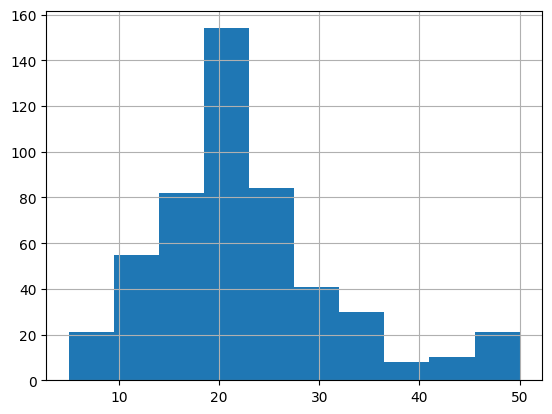

In [27]:
boston_data['MEDV'].hist();

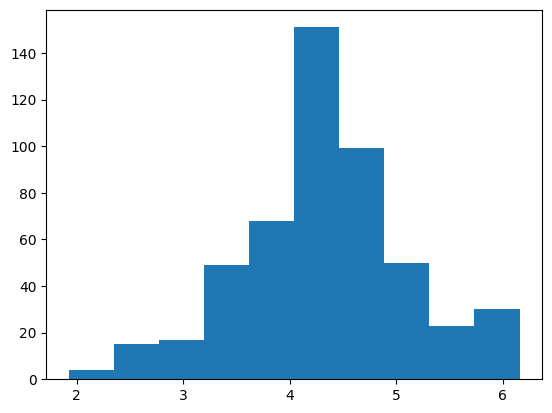

In [28]:
plt.hist(boxcox_medv);

In [29]:
normaltest(boxcox_medv)

NormaltestResult(statistic=np.float64(4.5135288641281655), pvalue=np.float64(0.10468866464430764))

We find that the box cox results in a graph which is significantly more normally distributed (according to p value) than the other two distributions.This can be even above 0.05.

Now that we have a normally distributed y-variable, let's test Regression using this transformed target variables.


### Testing regression:


In [30]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, PolynomialFeatures)

In [31]:
lr = LinearRegression()

**Define and load the predictor (X) and Target(y) variables**


In [32]:
y_col = "MEDV"

X = boston_data.drop(y_col, axis=1)
y = boston_data[y_col]

**Create Polynomial Features**


In [33]:
pf = PolynomialFeatures(degree=2, include_bias=False)
X_pf = pf.fit_transform(X)

In [40]:
X.shape, X_pf.shape

((506, 13), (506, 104))

**Split the data into Training and Test Sets**   

The split ratio here is 0.7 and 0.3 which means we will assign **70%** data for training and **30%** data for testing


In [44]:
X_train, X_test, y_train, y_test = train_test_split(X_pf, y, test_size=0.3, random_state=72018)

**Normalize the training data using `StandardScaler` on `X_train`. Use fit_transform() function**


In [45]:
X_train.shape

(354, 104)

In [50]:
X_train[0:1]

array([[3.47428000e+00, 0.00000000e+00, 1.81000000e+01, 1.00000000e+00,
        7.18000000e-01, 8.78000000e+00, 8.29000000e+01, 1.90470000e+00,
        2.40000000e+01, 6.66000000e+02, 2.02000000e+01, 3.54550000e+02,
        5.29000000e+00, 1.20706215e+01, 0.00000000e+00, 6.28844680e+01,
        3.47428000e+00, 2.49453304e+00, 3.05041784e+01, 2.88017812e+02,
        6.61746112e+00, 8.33827200e+01, 2.31387048e+03, 7.01804560e+01,
        1.23180597e+03, 1.83789412e+01, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 3.27610000e+02, 1.81000000e+01,
        1.29958000e+01, 1.58918000e+02, 1.50049000e+03, 3.44750700e+01,
        4.34400000e+02, 1.20546000e+04, 3.65620000e+02, 6.41735500e+03,
        9.57490000e+01, 1.00000000e+00, 7.18000000e-01, 8.78000000e+00,
        8.29000000e+01, 1.90470000e+00, 2.40000000e+01, 6.660000

In [46]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)

In [47]:
X_train_s.shape

(354, 104)

In [51]:
X_train_s[:1]

array([[-9.20613277e-03, -4.84011917e-01,  1.03845365e+00,
         3.79358727e+00,  1.42180894e+00,  3.54445686e+00,
         5.06081326e-01, -9.03599248e-01,  1.67672193e+00,
         1.54198986e+00,  8.04802542e-01, -2.46180966e-02,
        -1.01864280e+00, -1.42196096e-01, -4.01432746e-01,
        -9.80931469e-04,  5.29003291e+00,  2.14026734e-02,
         1.75201593e-01, -4.76206527e-02, -5.73318109e-03,
         1.85754566e-02,  6.95849486e-03, -3.68840805e-03,
         7.93665597e-02, -2.78392566e-01, -3.70594468e-01,
        -5.06132259e-01, -9.37691533e-02, -5.00640260e-01,
        -4.74835933e-01, -5.10731858e-01, -4.41138536e-01,
        -4.92371583e-01, -4.74495353e-01, -4.83255812e-01,
        -4.84237157e-01, -4.81448662e-01,  9.41341575e-01,
         4.75899953e+00,  1.24675697e+00,  2.22825467e+00,
         8.52125622e-01,  1.92014415e-01,  1.68321269e+00,
         1.39553898e+00,  1.14630897e+00,  1.07794759e+00,
        -4.34788276e-01,  3.79358727e+00,  4.30964116e+0

**Discuss: what transformation do we need to apply next?**

Apply the appropriate transformation.


In [52]:
# Enter your code here
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

In [55]:
y_train_bc[0:5]

array([4.86256859, 6.06291769, 4.5131041 , 4.81957898, 4.95725427])

In [56]:
lam2

np.float64(0.27517143960006146)

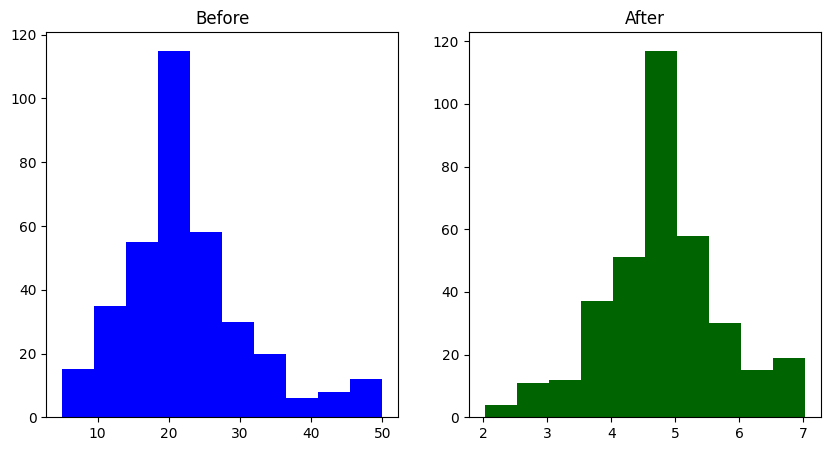

In [77]:
fig, ax = plt.subplots(1,2, figsize=(10,5))


ax[0].hist(y_train, color='blue')
ax[0].set_title("Before")

ax[1].hist(y_train_bc, color='darkgreen', )
ax[1].set_title("After")

plt.show()

<details><summary>Click here for a sample python solution</summary>

```python
    
bc_result2 = boxcox(y_train)
y_train_bc = bc_result2[0]
lam2 = bc_result2[1]

```


As before, we'll now:

1. Fit regression
1. Transform testing data
1. Predict on testing data


In [57]:
lr.fit(X_train_s, y_train_bc)
X_test_s = s.transform(X_test)      # StandardScaler()
y_pred_bc = lr.predict(X_test_s)

### Discussion

* Are we done?
* What did we predict?
* How would you interpret these predictions?


#### Apply inverse transformations to be able to use these in a Regression context


Every transformation has an inverse transformation. The inverse transformation of $f(x) = \sqrt{x}$ is $f^{-1}(x) = x^2$, for example. Box cox has an inverse transformation as well: notice that we have to pass in the lambda value that we found from before:


In [79]:
from scipy.special import inv_boxcox

In [80]:
inv_boxcox(boxcox_medv, lam)[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

In [81]:
boston_data['MEDV'].values[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

Exactly the same, as we would hope!


### Exercise:

1. Apply the appropriate inverse transformation to `y_pred_bc`.
2. Calculate the $R^2$ using the result of this inverse transformation and `y_test`.  

**Hint:** Use the **inv_boxcox()** function to get the transformed predicted values


In [82]:
#Enter your code here
y_pred_tran = inv_boxcox(y_pred_bc, lam2)
r2_score(y_test, y_pred_tran)

0.8884878246336827

<details><summary>Click here for a sample python solution</summary>

```python
y_pred_tran = inv_boxcox(y_pred_bc,lam2)
r2_score(y_test,y_pred_tran)

```


## Practice Exercise: 

### Determine the R^2 of a LinearRegression without the box cox transformation.


In [83]:
# Enter your code here
lr = LinearRegression()
lr.fit(X_train_s, y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test, lr_pred)

0.8689110469231047

<details><summary>Click here for a sample python solution</summary>

```python
lr = LinearRegression()
lr.fit(X_train_s,y_train)
lr_pred = lr.predict(X_test_s)
r2_score(y_test,lr_pred)

```


---
## Authors:

Niveditha


<!--## Change Log

|  Date (YYYY-MM-DD) |  Version | Changed By  |  Change Description |
|---|---|---|---|
| 2023-10-11 | 1.0 |Niveditha | Updated the notebook |
-->



<hr/>

## <h3 align="center"> © IBM Corporation 2023. All rights reserved. <h3/>
